In [1]:
#Content based recommender system for restaurant based on user preferences
#Libraries Import section
import numpy as np
import pandas as pd
import sklearn
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
uploaded = files.upload()

Saving Dataset .csv to Dataset .csv


In [3]:
df=pd.read_csv(io.BytesIO(uploaded['Dataset .csv']))

In [4]:
#EDA
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [10]:
#% of missing values in cuisines
df['Cuisines'].isna().sum()/len(df)*100

0.09423097057899697

<Axes: ylabel='count'>

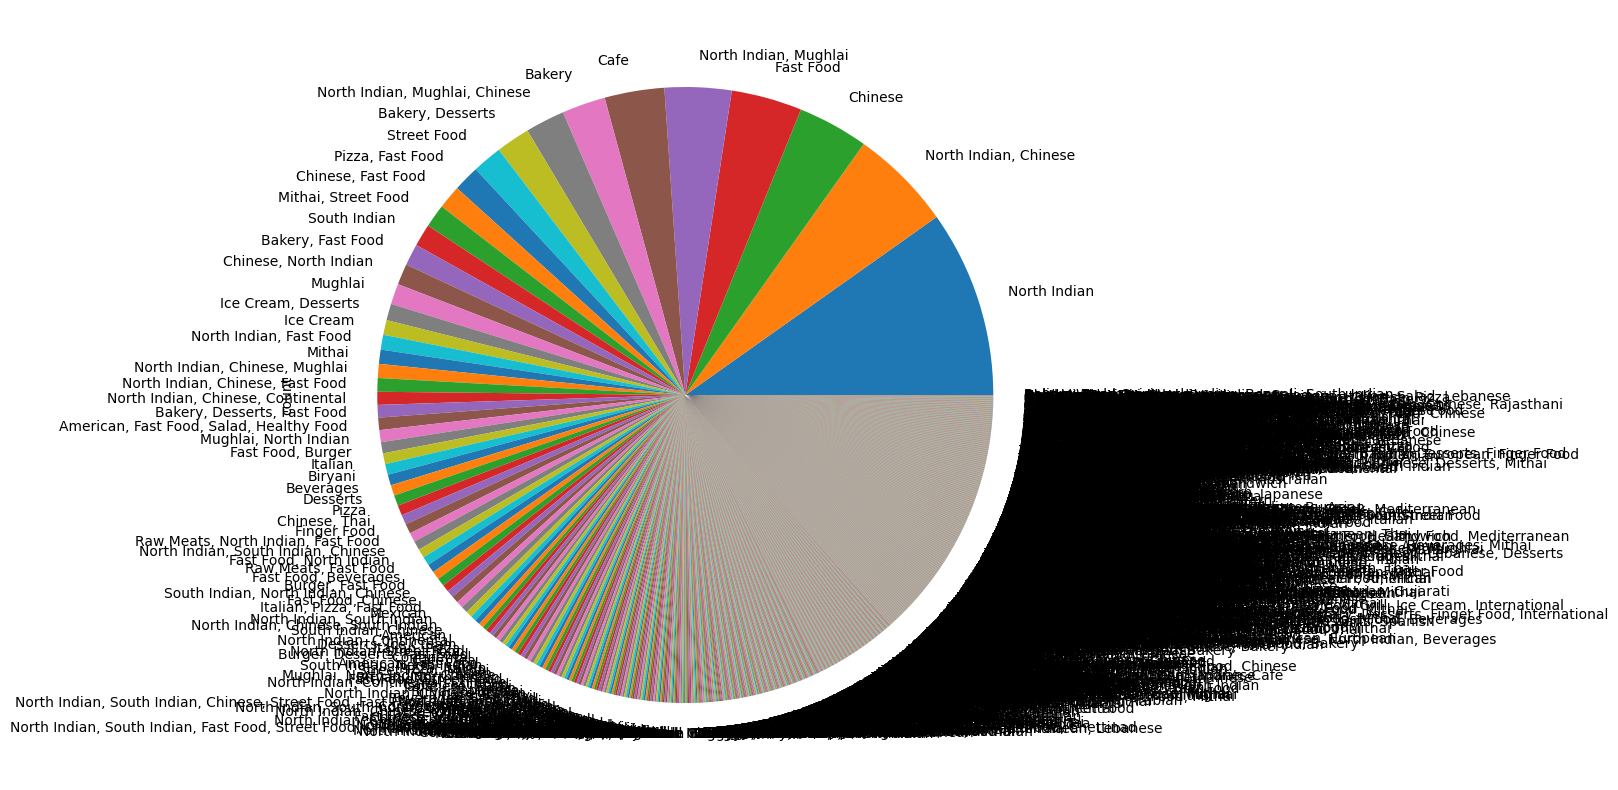

In [14]:
df['Cuisines'].value_counts().plot(kind='pie',figsize=(10,10))

<Axes: xlabel='Price range'>

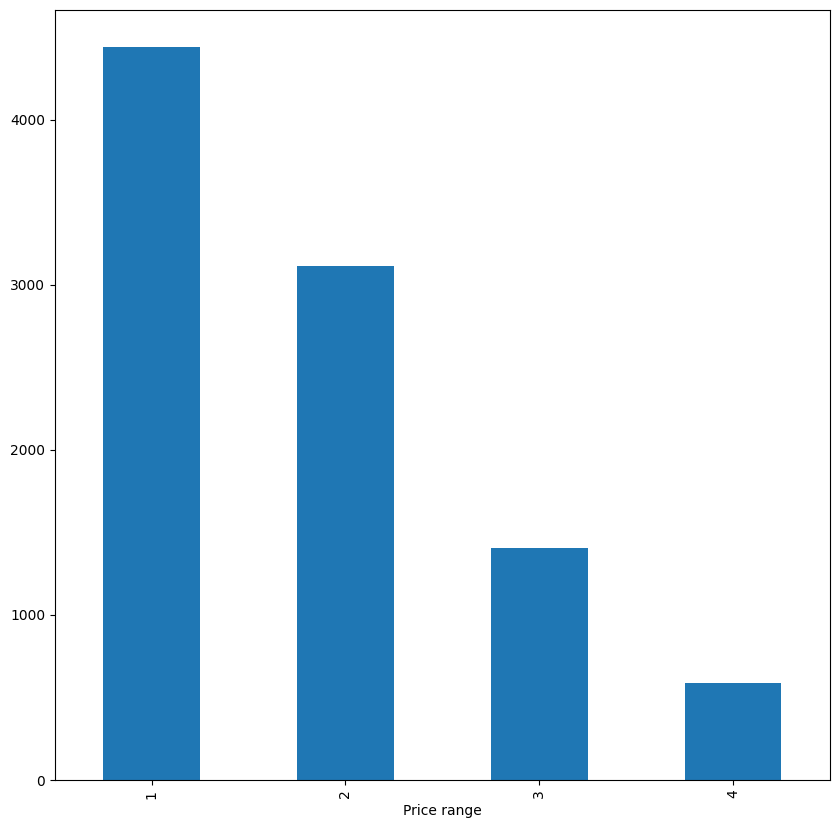

In [19]:
#Price range analysis
df['Price range'].value_counts().plot(kind='bar',figsize=(10,10))

In [20]:
df['Price range'].describe()

count    9551.000000
mean        1.804837
std         0.905609
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Price range, dtype: float64

In [22]:
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform
pd.reset_option('display.max_rows')

In [23]:
dfRS = df[['Restaurant ID','Restaurant Name','Cuisines','Aggregate rating','Votes']]
dfRS

,Restaurant ID,Restaurant Name,Cuisines,Aggregate rating,Votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",4.8,314
1,6304287,Izakaya Kikufuji,Japanese,4.5,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4.4,270
3,6318506,Ooma,"Japanese, Sushi",4.9,365
4,6314302,Sambo Kojin,"Japanese, Korean",4.8,229
...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,Turkish,4.1,788
9547,5908749,Ceviz A��ac۱,"World Cuisine, Patisserie, Cafe",4.2,1034
9548,5915807,Huqqa,"Italian, World Cuisine",3.7,661
9549,5916112,A���k Kahve,Restaurant Cafe,4.0,901


In [25]:
dfRS = dfRS.dropna()

In [27]:
#Modifying column names
dfRS = dfRS.rename(columns={'Restaurant ID': 'restaurant_id'})
dfRS = dfRS.rename(columns={'Restaurant Name': 'restaurant_name'})
dfRS = dfRS.rename(columns={'Cuisines': 'cuisines'})
dfRS = dfRS.rename(columns={'Aggregate rating': 'aggregate_rating'})
dfRS = dfRS.rename(columns={'Votes': 'votes'})
dfRS

,restaurant_id,restaurant_name,cuisines,aggregate_rating,votes
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",4.8,314
1,6304287,Izakaya Kikufuji,Japanese,4.5,591
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4.4,270
3,6318506,Ooma,"Japanese, Sushi",4.9,365
4,6314302,Sambo Kojin,"Japanese, Korean",4.8,229
...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,Turkish,4.1,788
9547,5908749,Ceviz A��ac۱,"World Cuisine, Patisserie, Cafe",4.2,1034
9548,5915807,Huqqa,"Italian, World Cuisine",3.7,661
9549,5916112,A���k Kahve,Restaurant Cafe,4.0,901


In [30]:
# Measure Similarity
xTabRestoCuisines = pd.crosstab(dfRS['restaurant_name'],
                                dfRS['cuisines'])
# Create Similarity Value DF
jaccardDist = pdist(xTabRestoCuisines.values, metric='jaccard')
jaccardMatrix = squareform(jaccardDist)
jaccardSim = 1 - jaccardMatrix
dfJaccard = pd.DataFrame(
    jaccardSim,
    index=xTabRestoCuisines.index,
    columns=xTabRestoCuisines.index)

dfJaccard

restaurant_name,#45,#Dilliwaala6,#InstaFreeze,#OFF Campus,#Urban Caf��,#hashtag,'Ohana,10 Downing Street,10 To 10 In Delhi,11th Avenue Cafe Bistro,...,feel ALIVE,hug!,iGNiTE,iKitchen,sketch Gallery,t Lounge by Dilmah,tashas,wagamama,{Niche} - Cafe & Bar,�ukura��a Sofras۱
restaurant_name,,,,,,,,,,,,,,,,,,,,,
#45,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Dilliwaala6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#InstaFreeze,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#OFF Campus,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
#Urban Caf��,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t Lounge by Dilmah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
tashas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
wagamama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
dfRS['restaurant_name'].sample(20)

9380                      Duck & Waffle
7170              Sultan Chicken Corner
545               HuHot Mongolian Grill
9021               Oh Buoy - Flying Fox
9479                    Life Grand Cafe
2545                    Barbeque Nation
3664                       Bun Intended
7472    Yellow Brick Road - Taj Vivanta
9099         Chef's Basket Pop Up Caf��
2517                            Nanking
9063                              Swaad
2456                       Aman Chicken
5632                          Vedanta's
613                           Pizza Hut
1545                       Doughlicious
5470                           Frontier
5238                  Caravan Resto Bar
8891                          RollsKing
7253                   Ram Chinese Food
3003                       Costa Coffee
Name: restaurant_name, dtype: object

In [34]:
# Input Initial Restaurant Name
resto = 'Roka'

sim = dfJaccard.loc[resto].sort_values(ascending=False)

sim = pd.DataFrame({'restaurant_name': sim.index, 'simScore': sim.values})
sim = sim[(sim['restaurant_name']!= resto) & (sim['simScore']>=0.7)].head(5)

# Merge The Rating
RestoRec = pd.merge(sim,dfRS[['restaurant_name','aggregate_rating']],how='inner',on='restaurant_name')
FinalRestoRec = RestoRec.sort_values('aggregate_rating',ascending=False).drop_duplicates('restaurant_name',keep='first')

In [35]:
FinalRestoRec

,restaurant_name,simScore,aggregate_rating
3,Nobu,1.0,4.4
2,Osaka,1.0,4.2
0,Sushi Haus,1.0,3.8
4,Sakura,1.0,3.8
1,IZU,1.0,3.4


The recommender system performs well,and suggest a list of 5 similar restaurants to the one liked by the user